In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
import pandas as pd

In [74]:
n = 3856

In [75]:
r = int(math.ceil(np.sqrt(n/np.pi)))

In [76]:
a = []
for radius in range(1,r+1):
    area = radius * radius * np.pi
    a.append(area)

In [77]:
sizes = [int(round(a[i]-a[i-1])) for i in range(1,len(a))]

In [78]:
sizes.insert(0,int(round(a[0])))

In [79]:
radii = range(1,r+1)

In [80]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

In [81]:
all_x = []
all_y = []
all_phi = []
all_rad = []

for i in range(r):
    
    radius = radii[i]
    size = sizes[i]
    radstep = 2*np.pi / size # circumference is 2pi radians
    jitter = np.random.choice(np.arange(0,2*np.pi/3,np.pi/1024))
    phis = np.arange(-np.pi+jitter,np.pi+jitter,radstep) # so they don't all start at -pi
    phis = [-np.pi+(item-np.pi) if item > np.pi else item for item in phis] # reset to [-pi,pi]
    
    ppts = [(radius,phi) for phi in phis]
    pts = [pol2cart(ppt[0],ppt[1]) for ppt in ppts]
    
    all_x.append([item[0] for item in pts])
    all_y.append([item[1] for item in pts])
    all_phi.append([item[1] for item in ppts])
    all_rad.append([item[0] for item in ppts])
    
all_x = [item for sublist in all_x for item in sublist]
all_y = [item for sublist in all_y for item in sublist]
all_phi = [item for sublist in all_phi for item in sublist]
all_rad = [item for sublist in all_rad for item in sublist]

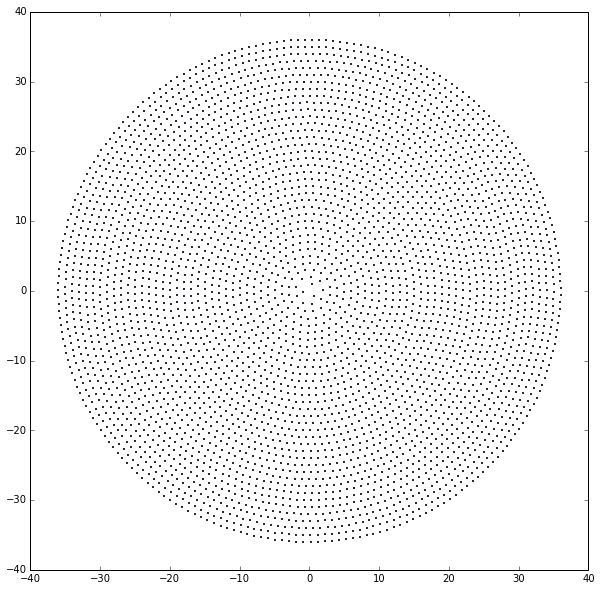

In [82]:
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(all_x,all_y,s=1)

In [83]:
from shapely.geometry import Point

In [84]:
center = Point(0,0)

In [85]:
df = pd.DataFrame(all_x,columns=['x'])

In [86]:
df['y'] = all_y

In [87]:
df['phi'] = all_phi
df['radius'] = all_rad

In [88]:
df['distance'] = [center.distance(Point(df.x[i],df.y[i])) for i in range(len(df))]

In [89]:
tmp = df.sort('distance')[:n]

In [90]:
tmp.reset_index(drop=True,inplace=True)

In [91]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3856 entries, 0 to 3855
Data columns (total 5 columns):
x           3856 non-null float64
y           3856 non-null float64
phi         3856 non-null float64
radius      3856 non-null int64
distance    3856 non-null float64
dtypes: float64(4), int64(1)
memory usage: 180.8 KB


In [92]:
tmp['phibin'] = pd.cut(tmp.phi,360,labels=False)

In [93]:
tmp.to_csv("./glyph_ball_flighttest.csv",index=False)

In [94]:
%matplotlib inline

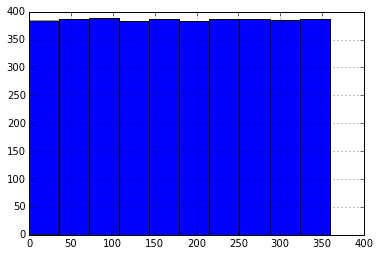

In [72]:
tmp.phibin.hist()

In [801]:
d = pd.read_csv("/Users/damoncrockett/Desktop/astrophotography_data/glyph_ball_quality.csv")

In [802]:
meta = d[['size','year','make','emp','type']].sort('size',ascending=False)

In [803]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3856 entries, 0 to 3855
Data columns (total 5 columns):
size    3856 non-null float64
year    3856 non-null float64
make    3856 non-null object
emp     3856 non-null float64
type    3856 non-null object
dtypes: float64(3), object(2)
memory usage: 180.8+ KB


In [804]:
meta.reset_index(drop=True,inplace=True)

In [805]:
tmp['size'] = meta['size']
tmp['year'] = meta.year
tmp['make'] = meta.make
tmp['type'] = meta['type']
tmp['emp'] = meta.emp

In [806]:
tmp.to_csv("/Users/damoncrockett/Desktop/astrophotography_data/glyph_ball_quality_R.csv",index=False)

In [807]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3856 entries, 0 to 3855
Data columns (total 8 columns):
x           3856 non-null float64
y           3856 non-null float64
distance    3856 non-null float64
size        3856 non-null float64
year        3856 non-null float64
make        3856 non-null object
type        3856 non-null object
emp         3856 non-null float64
dtypes: float64(6), object(2)
memory usage: 271.1+ KB
